In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Data preprocessing**

In [7]:
train = pd.read_csv("/kaggle/input/assignment-3-predicting-future-stock-price-gradient-gains/train (1).csv")
test = pd.read_csv("/kaggle/input/assignment-3-predicting-future-stock-price-gradient-gains/test (1).csv")

Now we add the lag columns to match the format of the test dataset.

In [8]:
FEATURES = ['Open', 'High', 'Low', 'Close', 'Volume']

#Adding the lag columns for training dataset to match the format of the testing dataset
for feature in FEATURES:
    for lag in range(30):
        train[f"{feature}_Lag_{lag}"] = train[feature].shift(lag)

train = train.dropna().reset_index(drop=True)
train = train.copy()
train.head()

/tmp/ipykernel_55/2419205302.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feature}_Lag_{lag}"] = train[feature].shift(lag)
/tmp/ipykernel_55/2419205302.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feature}_Lag_{lag}"] = train[feature].shift(lag)
/tmp/ipykernel_55/2419205302.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

,ID,Open,High,Low,Close,Volume,Target,Open_Lag_0,Open_Lag_1,Open_Lag_2,...,Volume_Lag_20,Volume_Lag_21,Volume_Lag_22,Volume_Lag_23,Volume_Lag_24,Volume_Lag_25,Volume_Lag_26,Volume_Lag_27,Volume_Lag_28,Volume_Lag_29
0,29,67.313559,67.849424,67.301341,67.832841,1.640550e+08,67.862519,67.313559,67.495092,67.469782,...,2.173713e+08,2.350117e+08,1.790079e+08,3.055993e+08,2.575547e+08,1.364571e+08,1.456442e+08,1.746938e+08,2.601757e+08,2.172148e+08
1,30,67.947175,68.215106,67.718517,67.862519,2.180963e+08,68.246524,67.947175,67.313559,67.495092,...,1.903480e+08,2.173713e+08,2.350117e+08,1.790079e+08,3.055993e+08,2.575547e+08,1.364571e+08,1.456442e+08,1.746938e+08,2.601757e+08
2,31,68.078084,68.411472,67.900918,68.246524,2.013497e+08,69.600149,68.078084,67.947175,67.313559,...,2.144504e+08,1.903480e+08,2.173713e+08,2.350117e+08,1.790079e+08,3.055993e+08,2.575547e+08,1.364571e+08,1.456442e+08,1.746938e+08
3,32,68.964794,70.073177,68.908065,69.600149,4.249373e+08,69.368000,68.964794,68.078084,67.947175,...,3.000276e+08,2.144504e+08,1.903480e+08,2.173713e+08,2.350117e+08,1.790079e+08,3.055993e+08,2.575547e+08,1.364571e+08,1.456442e+08
4,33,69.388073,69.925682,69.220506,69.368000,2.151281e+08,69.795645,69.388073,68.964794,68.078084,...,1.909943e+08,3.000276e+08,2.144504e+08,1.903480e+08,2.173713e+08,2.350117e+08,1.790079e+08,3.055993e+08,2.575547e+08,1.364571e+08


Creating a column "residual" that records the "residual price" i.e. the difference between tomorrow's and today's price.

In [9]:
train['residual'] = train['Target'] - train['Close']   # target for model

Now we create functions for various technical indicators to apply them to our dataset. We will use these indicators as features for training our model.

In [10]:
#We will define functions for each indicator such that we can easily call them for our test dataset too.

def SMA_30(data):
  close_cols = [f'Close_Lag_{i}' for i in range(30)]
  data['SMA_30'] = data[close_cols].apply(lambda row: row.mean(), axis = 1)

def EMA_30(data):
  close_cols = [f'Close_Lag_{i}' for i in range(30)]
  data['EMA_30'] = data[close_cols].apply(lambda row: row[::-1].ewm(span=5).mean().iloc[-1], axis=1)

def Volatility_30(data):
  close_cols = [f'Close_Lag_{i}' for i in range(30)]
  data['Volatility_30'] = data[close_cols].apply(lambda row: row.std(), axis = 1)

def Momentum_30(data):
  data['Momentum_30'] = data['Close_Lag_0'] - data['Close_Lag_29']

def AvgVolume_30(data):
  vol_cols = [f'Volume_Lag_{i}' for i in range(30)]
  data['AvgVolume_30'] = data[vol_cols].apply(lambda row: row.mean(), axis = 1)

# call functions for train dataset

SMA_30(train)
EMA_30(train)
Volatility_30(train)
Momentum_30(train)
AvgVolume_30(train)
train = train.dropna()
train

,ID,Open,High,Low,Close,Volume,Target,Open_Lag_0,Open_Lag_1,Open_Lag_2,...,Volume_Lag_26,Volume_Lag_27,Volume_Lag_28,Volume_Lag_29,residual,SMA_30,EMA_30,Volatility_30,Momentum_30,AvgVolume_30
0,29,67.313559,67.849424,67.301341,67.832841,1.640550e+08,67.862519,67.313559,67.495092,67.469782,...,1.456442e+08,1.746938e+08,2.601757e+08,2.172148e+08,0.029678,66.779764,67.396667,0.690300,0.186762,2.015034e+08
1,30,67.947175,68.215106,67.718517,67.862519,2.180963e+08,68.246524,67.947175,67.313559,67.495092,...,1.364571e+08,1.456442e+08,1.746938e+08,2.601757e+08,0.384006,66.786979,67.551951,0.700719,0.500956,2.015328e+08
2,31,68.078084,68.411472,67.900918,68.246524,2.013497e+08,69.600149,68.078084,67.947175,67.313559,...,2.575547e+08,1.364571e+08,1.456442e+08,1.746938e+08,1.353625,66.816477,67.783477,0.743089,0.806414,1.995719e+08
3,32,68.964794,70.073177,68.908065,69.600149,4.249373e+08,69.368000,68.964794,68.078084,67.947175,...,3.055993e+08,2.575547e+08,1.364571e+08,1.456442e+08,-0.232150,66.888479,68.389038,0.894767,2.073640,2.079133e+08
4,33,69.388073,69.925682,69.220506,69.368000,2.151281e+08,69.795645,69.388073,68.964794,68.078084,...,1.790079e+08,3.055993e+08,2.575547e+08,1.364571e+08,0.427645,66.949862,68.715362,0.997333,1.927889,2.102295e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1032,207.876855,207.876855,205.262134,206.451443,1.086530e+08,205.681883,207.876855,208.174197,205.594438,...,1.286113e+08,1.092397e+08,1.321949e+08,1.983912e+08,-0.769560,206.825724,207.417143,4.485258,3.358044,1.549291e+08
1004,1033,206.433946,208.445279,202.603670,205.681883,1.418938e+08,207.325929,206.433946,207.876855,208.174197,...,1.230809e+08,1.286113e+08,1.092397e+08,1.321949e+08,1.644046,206.912006,206.838727,4.435606,2.719660,1.530459e+08
1005,1034,205.804310,208.086733,205.253376,207.325929,9.739202e+07,210.911336,205.804310,206.433946,207.876855,...,1.852659e+08,1.230809e+08,1.286113e+08,1.092397e+08,3.585406,207.057463,207.001136,4.372718,3.795287,1.518858e+08
1006,1035,208.795068,211.969476,208.497744,210.911336,1.148242e+08,215.484937,208.795068,205.804310,206.433946,...,1.677047e+08,1.852659e+08,1.230809e+08,1.286113e+08,4.573601,207.303486,208.304549,4.375075,7.441918,1.520719e+08


In [11]:
lag_cols = [c for c in train.columns if 'Lag_' in c]
indicator_cols = [
    'SMA_30',
    'EMA_30',
    'Volatility_30',
    'Momentum_30',
    'AvgVolume_30'
]

FEATURE_COLS = lag_cols + indicator_cols
TARGET_COL = 'Target'

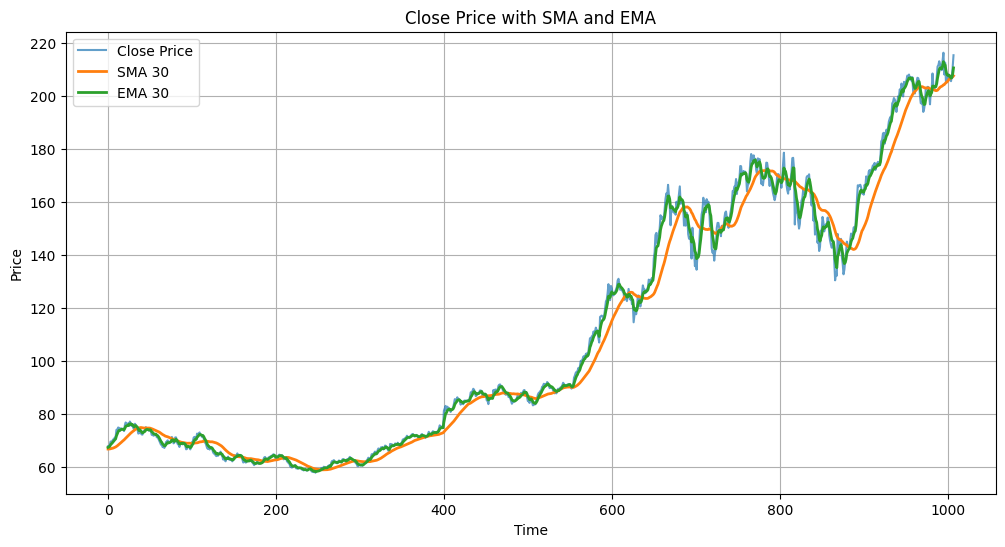

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(train['Close'], label='Close Price', alpha=0.7)
plt.plot(train['SMA_30'], label='SMA 30', linewidth=2)
plt.plot(train['EMA_30'], label='EMA 30', linewidth=2)

plt.title('Close Price with SMA and EMA')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

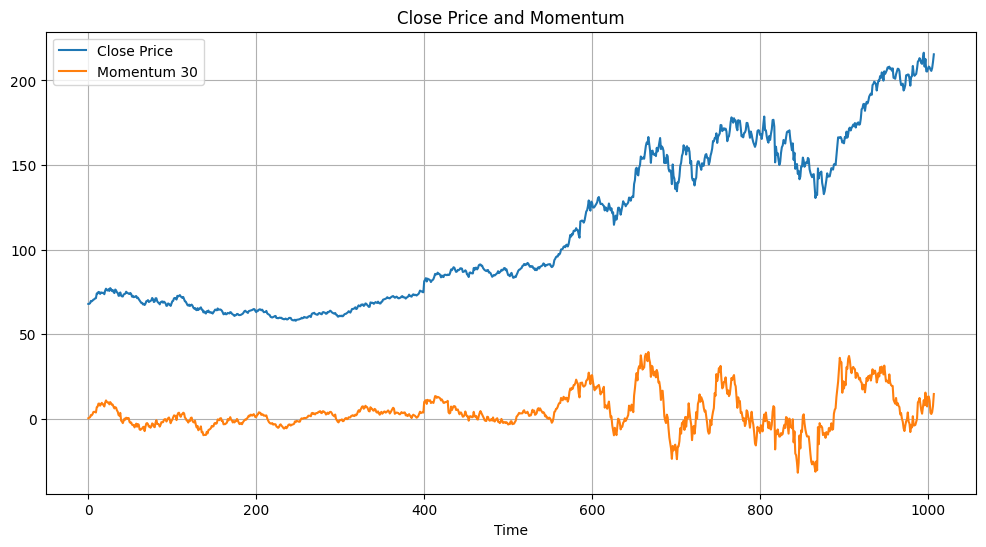

In [13]:
plt.figure(figsize=(12, 6))

plt.plot(train['Close'], label='Close Price')
plt.plot(train['Momentum_30'], label='Momentum 30')

plt.title('Close Price and Momentum')
plt.xlabel('Time')
plt.legend()
plt.grid(True)

plt.show()

Splitting into training and validation datasets, taking care of the fact that we can't shuffle time series data.

In [14]:
X = train[FEATURE_COLS]
y = train['Target']

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

In [50]:
y_res = train['residual']

from sklearn.model_selection import train_test_split

X_tr_res, X_val_res, y_tr_res, y_val_res = train_test_split(
    X, y_res,
    test_size=0.2,
    shuffle=False
)

In [16]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X_tr)
X_tr = scale.transform(X_tr)
X_val = scale.transform(X_val)

# **Training our models**

We have trained 4 different models for our purposes.
* Random forest
* Linear regression
* Gradient boosting
* ElasticNet
  
These are divided into two main approaches.
1. Predicting the raw price directly using the feature columns. This is what the linear regression and ElasticNet models do.
2. Predicting the *difference* between tomorrow's price (the target) and today's price. Then, the final price prediction for tomorrow is today's price + this difference. The reason for this approach is that it gave better results than directly predicting the target price. [https://stats.stackexchange.com/questions/497877/forecasting-prices-vs-returns-by-deep-learning]

Quoting the above link,
> Today's price is a great predictor of tomorrow's price.

In other words, tomorrow's price is generally very close to today's price. This is why the linear regression model "performs" exceptionally well, close to the RF/boosting models themselves. In predicting tomorrow's price, the final linear function simply assigns a very large weight to today's price. In fact, if we train a "dummy" model where the "prediction" for tomorrow's price is simply equal to today's price, that dummy model also performs quite well! In fact, the dummy model performed better than the RF/boosting models that were directly predicting the target price instead of the difference. Hence, the approach of predicting the (small) difference between tomorrow's and today's price was adopted. It is much harder to train a model to predict this residual price column since it varies very quickly.


In [51]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_tr_res, y_tr_res)

RandomForestRegressor(max_depth=10, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [52]:
print(rf.score(X_tr_res, y_tr_res))
print(rf.score(X_val_res, y_val_res))

0.6867946251326713
-0.23954688094854482


In [53]:
from sklearn.metrics import root_mean_squared_error, r2_score

val_preds = rf.predict(X_val_res) + X_val_res['Close_Lag_0'].values
rmse = root_mean_squared_error(y_val, val_preds)
print("Random Forest RMSE:", rmse)
print("R2_score RF:", r2_score(y_val, val_preds))

Random Forest RMSE: 4.113254639251198
R2_score RF: 0.9723234983787679


In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_tr, y_tr)

LinearRegression()

In [21]:
val_preds_lr = lr.predict(X_val)
rmse_lr = root_mean_squared_error(y_val, val_preds_lr)

print("Linear Regression RMSE:", rmse_lr)
print("R2_score LR:", r2_score(y_val, val_preds_lr))

Linear Regression RMSE: 4.7689166105064285
R2_score LR: 0.9627968718884089


In [41]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=500,     
    learning_rate=0.05,   
    max_depth=8,          
    random_state=42
)

gbr.fit(X_tr_res, y_tr_res)

GradientBoostingRegressor(learning_rate=0.05, max_depth=8, n_estimators=500,
                          random_state=42)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
val_preds_gbr_res = gbr.predict(X_val_res)
val_preds_gbr = val_preds_gbr_res + X_val_res['Close_Lag_0'].values
rmse_gbr = root_mean_squared_error(y_val, val_preds_gbr)

print("Gradient Boosting RMSE:", rmse_gbr)
print("R2_score:", r2_score(y_val, val_preds_gbr))

Gradient Boosting RMSE: 4.186273286628986
R2_score: 0.9713321480038605


In [45]:
r2_score(val_preds_gbr_res, y_val_res)

-3.4865446596304643

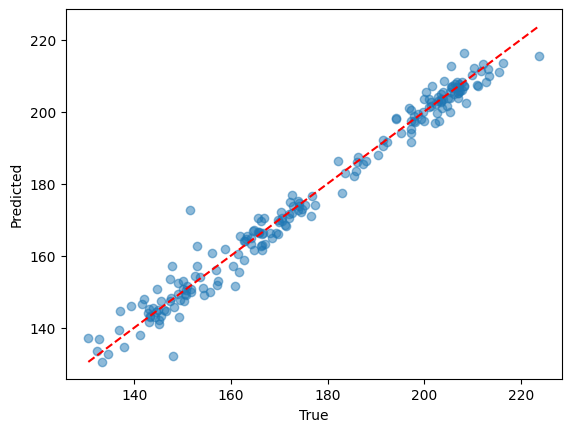

In [44]:
plt.scatter(y_val, val_preds_gbr, alpha=0.5)
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()], 'r--')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [25]:
from sklearn.linear_model import ElasticNet


enet = ElasticNet(
    alpha=0.1,
    l1_ratio=0.5,
    random_state=42,
    max_iter=10000
)

enet.fit(X_tr, y_tr)

val_preds_enet = enet.predict(X_val)
rmse_enet = root_mean_squared_error(y_val, val_preds_enet)

print("Elastic Net RMSE:", rmse_enet)
print("R2_score:", r2_score(y_val, val_preds_enet))

Elastic Net RMSE: 4.313471409672854
R2_score: 0.9695635603664275


# **Generating submissions**

In [26]:
# call functions for test dataset

SMA_30(test)
EMA_30(test)
Volatility_30(test)
Momentum_30(test)
AvgVolume_30(test)

test

,ID,Open_Lag_0,Open_Lag_1,Open_Lag_2,Open_Lag_3,Open_Lag_4,Open_Lag_5,Open_Lag_6,Open_Lag_7,Open_Lag_8,...,Volume_Lag_26,Volume_Lag_27,Volume_Lag_28,Volume_Lag_29,Target,SMA_30,EMA_30,Volatility_30,Momentum_30,AvgVolume_30
0,Test_0,206.976131,200.854696,204.571276,206.862451,200.985869,204.991045,206.521399,219.385167,209.625832,...,1.148242e+08,9.739202e+07,1.418938e+08,1.086530e+08,NaN,213.245073,205.666782,7.976597,0.262351,1.801260e+08
1,Test_1,207.938074,215.100160,219.184037,218.694320,218.650599,209.722039,219.796181,221.851241,225.550332,...,1.600384e+08,1.138379e+08,1.225126e+08,1.378958e+08,NaN,214.360342,215.252664,7.199688,4.048898,1.613704e+08
2,Test_2,209.722039,219.796181,221.851241,225.550332,229.992748,228.567323,227.430487,229.905302,216.849152,...,1.196422e+08,1.520343e+08,2.072494e+08,1.688418e+08,NaN,213.460782,216.801959,7.120990,5.509285,1.600283e+08
3,Test_3,206.381485,206.976131,200.854696,204.571276,206.862451,200.985869,204.991045,206.521399,219.385167,...,1.342005e+08,1.148242e+08,9.739202e+07,1.418938e+08,NaN,213.199308,205.470682,8.020735,-0.603395,1.813182e+08
4,Test_4,229.992748,228.567323,227.430487,229.905302,216.849152,214.173200,208.795068,205.804310,206.433946,...,1.299337e+08,1.675503e+08,1.255526e+08,1.684011e+08,NaN,211.745320,224.847730,7.608630,24.879289,1.550155e+08
5,Test_5,212.389644,208.043179,208.873989,202.533573,200.662058,202.035093,202.175009,203.644243,206.416534,...,1.518454e+08,1.631821e+08,1.813998e+08,1.354971e+08,NaN,207.221323,209.508059,4.448026,-4.529431,1.722383e+08
6,Test_6,204.991045,206.521399,219.385167,209.625832,208.392811,210.657742,207.938074,215.100160,219.184037,...,1.514137e+08,1.571752e+08,1.875456e+08,1.798417e+08,NaN,213.567761,207.802106,7.643891,2.203725,1.773551e+08
7,Test_7,208.043179,208.873989,202.533573,200.662058,202.035093,202.175009,203.644243,206.416534,205.690664,...,1.631821e+08,1.813998e+08,1.354971e+08,1.543417e+08,NaN,207.353648,207.774306,4.678206,-3.445023,1.754728e+08
8,Test_8,210.308235,207.754579,208.847754,206.862544,206.381485,206.976131,200.854696,204.571276,206.862451,...,1.572442e+08,1.564241e+08,2.700839e+08,2.606009e+08,NaN,213.087403,208.582312,7.962629,-14.035331,1.842938e+08
9,Test_9,221.851241,225.550332,229.992748,228.567323,227.430487,229.905302,216.849152,214.173200,208.795068,...,2.072494e+08,1.688418e+08,1.299337e+08,1.675503e+08,NaN,212.867585,222.129785,7.546256,15.321093,1.557194e+08


In [27]:
X_test = test[FEATURE_COLS]

In [28]:
X_test_scaled = scale.transform(X_test)

In [29]:
test_preds_lr = lr.predict(X_test_scaled)

pd.DataFrame({
    'ID': test['ID'],
    'TARGET': test_preds_lr
}).to_csv("submission_lr.csv", index=False)


In [30]:
test_preds_enet = enet.predict(X_test_scaled)

pd.DataFrame({
    'ID': test['ID'],
    'TARGET': test_preds_enet
}).to_csv("submission_enet.csv", index=False)


In [31]:
test_preds_rf = rf.predict(X_test) + X_test['Close_Lag_0'].values

pd.DataFrame({
    'ID': test['ID'],
    'TARGET': test_preds_rf
}).to_csv("submission_rf.csv", index=False)


In [47]:
val_preds_gbr_res = gbr.predict(X_test)
test_preds_gbr = val_preds_gbr_res + X_test['Close_Lag_0'].values

pd.DataFrame({
    'ID': test['ID'],
    'TARGET': test_preds_gbr
}).to_csv("submission_gbr.csv", index=False)


In [33]:
rf_better = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_better.fit(X, y_res)
test_preds_rf_better = rf_better.predict(X_test) + X_test['Close_Lag_0'].values

pd.DataFrame({
    'ID': test['ID'],
    'TARGET': test_preds_rf_better
}).to_csv("submission_rf_better.csv", index=False)

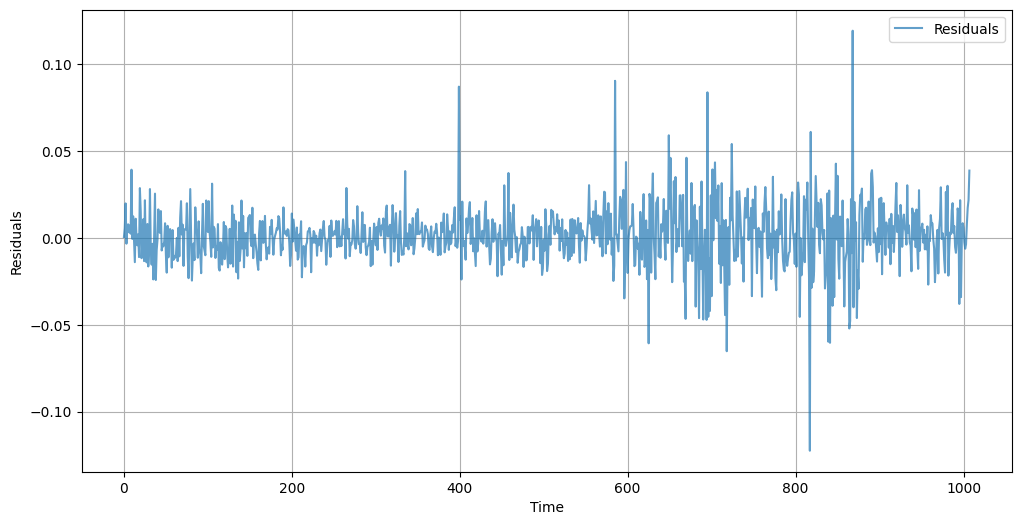

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(train['residual']/train['Close'], label='Residuals', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.show()